# <center> Adobe Software Data Analysis Project </center>

### Introduction:
UniMelb is having issues with Adobe Software Vendors. <br>
Therefore, it has decided to explore alternative options such as Nitro. <br>
In order to make the transition, the Relationship Managers need to reach out to create messaging around localised impact. <br>

### Objective:
To assist with the transition to Nitro,
this project aims to understand which faculty consumes Adobe the most. <br>
To get a list of Top 10 users per faculty such for the Nitro pilot project. <br>


### Tasks:
1.1 [Student] Breakdown of software license consumption by faculty for only Admitted Students.<br>
1.2 [Student] Breakdown of software license consumption by faculty for all Students (Regardless of Enrolment status).<br>

2.1 [Staff] Breakdown of software usage data by faculty/department.<br>
2.2 [Staff] Breakdown of software install data by faculty/department. <br>

3.1 [Staff] Top 10 users of Adobe software for each faculty/department. 

# Table of contents

(I) Data Exploration <br>
(II) Source Data <br>
(III) Task 1.1 <br>
(IV) Task 1.2 <br>
(V) Task 2.1 <br>
(VI) Task 2.2 <br> 
(VII) Task 3.1 <br> 
(VIII) Glossary <br>

# (I) Data Exploration

In [1]:
#libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pwd = os.getcwd()
df = pd.read_excel(pwd + '\\Source data\\FinalSpreadSheet_UNFILTERED.xlsx')
#df.head()

### Notes: 
Student ID is the unique identifier <br>
Study package Cd is Course ID <br>
Spk Title is Course Title <br>
SSP Status is Enrolment Status <br>
Owing Organisational Unit Name is Faculty <br>
Owing Organisational Unit Code is Faculty Code <br>
somehow it converted last column as float

In [2]:
# Handling non-finite values
df['StuID_Provided_By_Jake'] = df['StuID_Provided_By_Jake'].replace('inf', np.inf)  # Convert 'inf' to infinity
df['StuID_Provided_By_Jake'] = df['StuID_Provided_By_Jake'].replace('NaN', np.nan)  # Convert 'NaN' to NaN
df['StuID_Provided_By_Jake'] = df['StuID_Provided_By_Jake'].fillna(0)  # Replace NaN with 0

# Convert the column to integer
df['StuID_Provided_By_Jake'] = df['StuID_Provided_By_Jake'].astype(int)

# Verify the data types
#print(df.dtypes)
df['StuID_Provided_By_Jake'] = df['StuID_Provided_By_Jake'].astype(int)
#df.head()

In [3]:
#df.tail()

In [4]:
#df.info()

In [5]:
#df.describe()

# (II) Source data

In [6]:
import pandas as pd
import os

#creating user_data lookup
pwd = os.getcwd()
df1 = pd.read_csv(pwd + '\\Source data\\ADUsers.csv')

user_data=df1.copy()
# Split the 'mail' column by "@" and select the second part
user_data['domain'] = df1['Email'].str.split('@').str[1]

#rename onPremisesDistinguishedName to user
user_data.rename(columns={'onPremisesDistinguishedName': 'user'}, inplace = True)
# Convert 'user' column to lowercase so that join doesn't fail.
user_data['user'] = user_data['user'].str.lower()

#creating fleet lookup
fleet = pd.read_csv(pwd + '\\Source data\\fleet.csv')
fleet['DeviceName'] = fleet['DeviceName'].str.lower()
# rename expected_asset_user to user
fleet.rename(columns={'expected_asset_user': 'user'}, inplace = True)
# Select only the desired columns
fleet = fleet[['DeviceName', 'user']]

#creating divisions lookup
divisions = pd.read_csv(pwd + '\\Source data\\divisions.csv')

<div style="border-bottom: 4px solid black;"></div>

<div style="margin-top: 10px;"></div>

<div style="margin-top: 10px;"></div>

<div style="border-bottom: 4px solid black;"></div>

# (III) Task 1.1 [Student] Breakdown of software license consumption by faculty for all Students.

### Source files: 
df = FinalSpreadSheet_UNFILTERED.csv (Spreadsheet provided by Jake containing Students and the courses they are enrolled in)

### Transformation steps:
None

### Load the file containing Students who have an Adobe license. 

In [7]:
import pandas as pd
import os

#creating user_data lookup
pwd = os.getcwd()
student_adobe = pd.read_excel(pwd + '\\Source data\\FinalSpreadSheet_UNFILTERED.xlsx')
student_adobe.rename(columns={'Owning Organisational Unit Name': 'department'}, inplace = True)
student_adobe = student_adobe.merge(divisions, on='department', how='left')
student_adobe.rename(columns={'Acronym': 'Faculty'}, inplace = True)
student_adobe['Faculty'].fillna('Division not found', inplace=True)
student_adobe = student_adobe.drop_duplicates(subset='Student Id')

In [8]:
# Group by 'Faculty' and count occurrences
faculty_counts = student_adobe['Faculty'].value_counts().reset_index()
faculty_counts.columns = ['Faculty', 'Count']

# Create a DataFrame from the grouped data
faculty_counts_df1 = pd.DataFrame(faculty_counts)

# Save the DataFrame to a CSV file
output_csv_path = pwd + '\\Output\\task_1_1.csv'
faculty_counts_df1.to_csv(output_csv_path, index=False)

faculty_counts_df1

Faculty  Count
0                  ABP   1508
1                 Arts    464
2                 MDHS    413
3                  SCI    347
4                 FFAM    282
5                 FEIT    218
6                  FBE    157
7                 MGSE    137
8                  Law     71
9                 COOP     34
10  Division not found     18

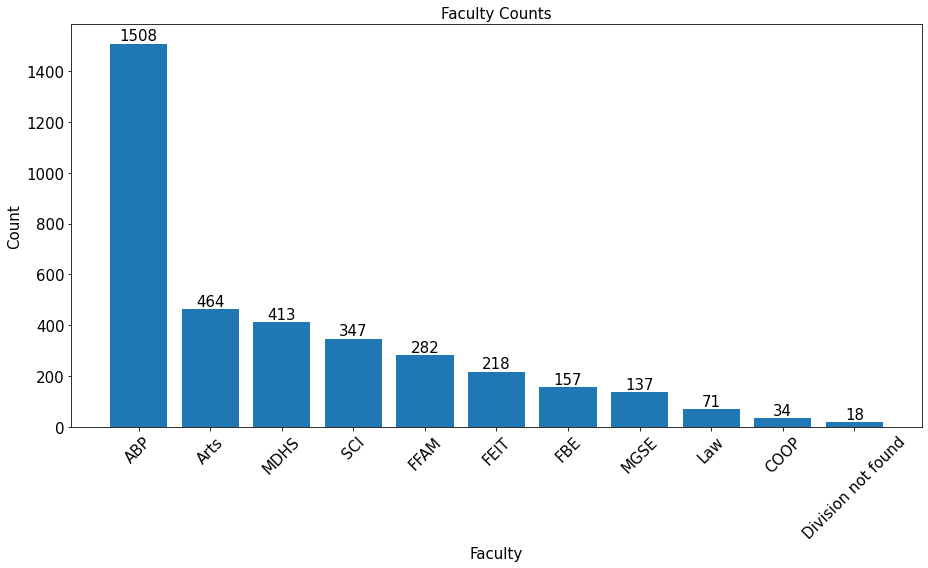

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a bar plot using Matplotlib
plt.figure(figsize=(13, 8))  # Set the figure size
bars = plt.bar(faculty_counts_df1['Faculty'], faculty_counts_df1['Count'])

# Add labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, int(yval), ha='center', va='bottom',fontsize=15 )

plt.xlabel('Faculty', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Faculty Counts', fontsize = 15)
plt.xticks(rotation=45, fontsize = 15)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=15)  
plt.tight_layout()

# Show the plot
plt.show()

# (IV) Task 1.2 [Student] Breakdown of software license consumption by faculty for only Admitted Students.

In [10]:
# Define the list of desired SSP Status values
desired_statuses = ['Admitted', 'Potentially Complete', 'Leave of Absence', 'Conditionally Complete']
# Use boolean indexing to filter the DataFrame
student_adobe_admitted = student_adobe[student_adobe['SSP Status'].isin(desired_statuses)]
unique_student_ids_df = student_adobe_admitted.drop_duplicates(subset='Student Id')

# Group by 'Faculty' and count occurrences
faculty_counts_admitted = unique_student_ids_df['Faculty'].value_counts().reset_index()
faculty_counts_admitted.columns = ['Faculty', 'Count']

# Create a DataFrame from the grouped data
faculty_counts_admitted = pd.DataFrame(faculty_counts_admitted)
faculty_counts_admitted

# Save the DataFrame to a CSV file
output_csv_path = pwd + '\\Output\\task_1_2.csv'
faculty_counts_admitted.to_csv(output_csv_path, index=False)

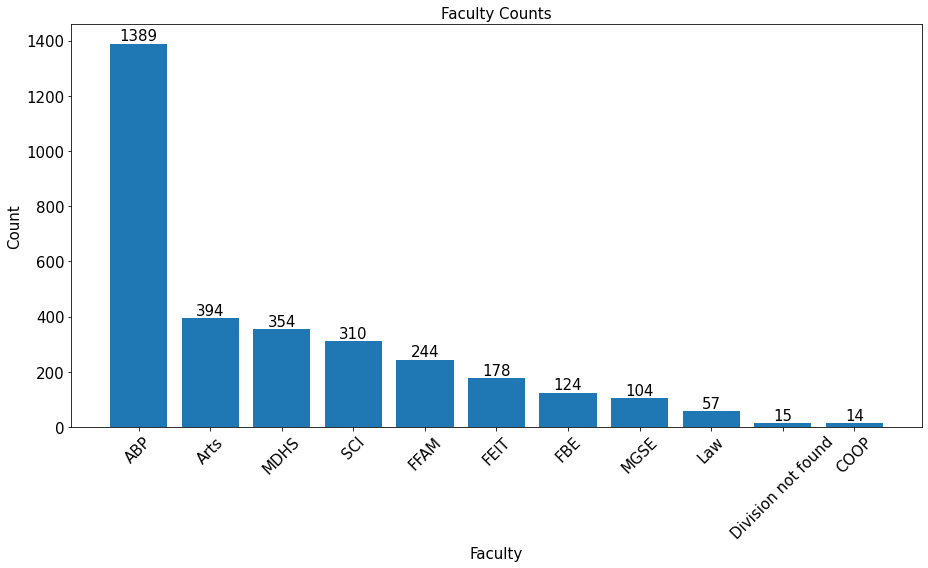

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a bar plot using Matplotlib
plt.figure(figsize=(13, 8))  # Set the figure size
bars = plt.bar(faculty_counts_admitted['Faculty'], faculty_counts_admitted['Count'])

# Add labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, int(yval), ha='center', va='bottom', fontsize=15)

plt.xlabel('Faculty', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Faculty Counts', fontsize = 15)
plt.xticks(rotation=45, fontsize = 15 )  # Rotate x-axis labels for better readability
plt.yticks(fontsize=15)  
plt.tight_layout()

# Show the plot
plt.show()


<div style="border-bottom: 4px solid black;"></div>

<div style="margin-top: 10px;"></div>

<div style="margin-top: 10px;"></div>

<div style="border-bottom: 4px solid black;"></div>

# (V) Task 2.1 - Get a breakdown of Adobe software usage by Faculty 

## <u>Source files:</u>

#### ad lookup
users = ADUsers.csv (contains UPN, Email, User ID and AccountStatus) <br>

#### 'Assigned to' lookup
fleet = fleet.csv (contains remediated asset data) <br>

#### division lookup
divisions = divisions.csv (contains mapping of Department to Division) <br>


## <u>Transformation steps: </u>
1. extract user ID string from onPremisesDistinguishedName
2. join df1 and df2 = df2
3. drop unwanted columns.
4. Remaining columns : User ID, displayName, AccountStatus, Title, Dept
5. join df3 and df4 = df5
6. Remove unwanted columns. convert to lowercase.
7. Remaining columns : DeviceName, User
8. Some rows in df5 have NaN under User column, drop them. <br>
<span style="color:red"> _Whats the use of a machine name if we don't know the owner._ <span style="color:red">
9. join df5 and df2 = merged_df
10. Remove unwanted columns.
11. Remaining columns : User, AccountEnabled, jobTitle, department
12. group by department
13. join merged_df and df6 = merged_df2 and drop rows <br>
and where 'Reporting Division' is NaN, set to 'Division Not found'
14. Columns DeviceName, User, AccountEnabled, jobTitle, department, Reporting Division
15. Drop rows where AccountEnabled is False
16. Drop rows where domain is 'student.unimelb.edu.au'
15. Group by 'Reporting Division', sort by desc.
16. Sort by 'Reporting Division' (Faculty)

### a. Create a function to transform the usage data (append columns, drop rows)

In [12]:
# this function does all the transformations in 1 go.
def general_transformer(adobe_software_merged, fleet, user_data, divisions):
    # Create a copy of adobe_software_merged
    input_dataframe = adobe_software_merged.copy()
    
    # Join with fleet data to get users for each device
    input_dataframe = input_dataframe.merge(fleet[['DeviceName', 'user']], on='DeviceName', how='left')
    
    # Drop rows where user is blank
    input_dataframe = input_dataframe.dropna(subset=['user'])
    
    # Join user_data with adobe_software_merged to get account status
    input_dataframe = input_dataframe.merge(user_data[['user', 'Email', 'AccountStatus', 'department', 'domain']], on='user', how='left')
    
    # Drop rows with account status = False or blank
    input_dataframe = input_dataframe[~((input_dataframe['AccountStatus'] == False) | (input_dataframe['AccountStatus'].isna()))]
    
    # Fill missing 'department' values with 'Department Blank'
    input_dataframe['department'] = input_dataframe['department'].fillna('Department Blank')
    
    # Join divisions with adobe_software_merged to get divisions
    input_dataframe = input_dataframe.merge(divisions[['Acronym', 'department']], on='department', how='left')
    
    # Rename Acronym column to Faculty
    input_dataframe.rename(columns={'Acronym': 'Faculty'}, inplace=True)
    
    # Fill missing 'department' and 'Faculty' values
    input_dataframe['department'] = input_dataframe['department'].fillna('Department is blank')
    input_dataframe['Faculty'] = input_dataframe['Faculty'].fillna('Division not found')
    
    return input_dataframe

### b. Adobe Software usage data is in 5 separate files, load them all into one.

In [13]:
#Load all the individual Adobe software usage sheets into 1 dataframe
folder_path = pwd + '\\Source Data\\SCCM Adobe Usage Data'
file_list = os.listdir(folder_path)
dataframes = []

for filename in file_list:
    if filename.endswith('.xlsx'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_excel(file_path)
        dataframes.append(df)
adobe_software_merged = pd.concat(dataframes, ignore_index=True)

#rename the asset column to DeviceName
adobe_software_merged.rename(columns={'NetBIOS Name': 'DeviceName'}, inplace = True)
adobe_software_merged['DeviceName'] = adobe_software_merged['DeviceName'].str.lower()

### c. Pass the dataframe loaded above into the transformer function. 

In [14]:
# Create a copy
adobe_software_merged2 = adobe_software_merged.copy()
# Pass it through the transformer function
adobe_processed_data = general_transformer(adobe_software_merged2, fleet, user_data, divisions)
adobe_processed_data.head()

Software Name      DeviceName Installed Site Code          Last Usage  \
0  Adobe Acrobat Pro  0060l-143422-w                 S01 2023-07-09 01:00:06   
1  Adobe Acrobat Pro  0060l-153113-w                 S01 2023-07-26 23:50:32   
2  Adobe Acrobat Pro  0060l-200343-w                 S01 2023-07-12 00:46:03   
3  Adobe Acrobat Pro  0060l-205321-w                 S01 2023-08-01 00:00:00   
4  Adobe Acrobat Pro  0060l-205442-w                 S01 2023-07-31 23:22:30   

   Total Usages  Average Usages per Day  Total Duration (min)  \
0             2                    0.06                  0.57   
1            60                    1.94               1651.48   
2             2                    0.06                  0.28   
3            22                    0.71              46115.03   
4            90                    2.90                147.58   

   Average Duration of Use (min)  Average Duration per Day (min)     user  \
0                           0.28                            0.02   leenas   
1                          27.52                           53.27  sbowman   
2                           0.14                            0.01   bakess   
3                        2096.14                         1487.58  acurrie   
4                           1.64                            4.76      pgr   

                         Email AccountStatus  \
0        leenas@unimelb.edu.au          True   
1       sbowman@unimelb.edu.au          True   
2  sophie.bakes@unimelb.edu.au          True   
3      a.currie@unimelb.edu.au          True   
4           pgr@unimelb.edu.au          True   

                           department          domain Faculty  
0            Vice-Chancellor's Office  unimelb.edu.au    COOP  
1  University Museums and Collections  unimelb.edu.au    COOP  
2            Vice-Chancellor's Office  unimelb.edu.au    COOP  
3            Vice-Chancellor's Office  unimelb.edu.au    COOP  
4            Vice-Chancellor's Office  unimelb.edu.au    COOP

In [15]:
adobe_processed_data.head()

Software Name      DeviceName Installed Site Code          Last Usage  \
0  Adobe Acrobat Pro  0060l-143422-w                 S01 2023-07-09 01:00:06   
1  Adobe Acrobat Pro  0060l-153113-w                 S01 2023-07-26 23:50:32   
2  Adobe Acrobat Pro  0060l-200343-w                 S01 2023-07-12 00:46:03   
3  Adobe Acrobat Pro  0060l-205321-w                 S01 2023-08-01 00:00:00   
4  Adobe Acrobat Pro  0060l-205442-w                 S01 2023-07-31 23:22:30   

   Total Usages  Average Usages per Day  Total Duration (min)  \
0             2                    0.06                  0.57   
1            60                    1.94               1651.48   
2             2                    0.06                  0.28   
3            22                    0.71              46115.03   
4            90                    2.90                147.58   

   Average Duration of Use (min)  Average Duration per Day (min)     user  \
0                           0.28                            0.02   leenas   
1                          27.52                           53.27  sbowman   
2                           0.14                            0.01   bakess   
3                        2096.14                         1487.58  acurrie   
4                           1.64                            4.76      pgr   

                         Email AccountStatus  \
0        leenas@unimelb.edu.au          True   
1       sbowman@unimelb.edu.au          True   
2  sophie.bakes@unimelb.edu.au          True   
3      a.currie@unimelb.edu.au          True   
4           pgr@unimelb.edu.au          True   

                           department          domain Faculty  
0            Vice-Chancellor's Office  unimelb.edu.au    COOP  
1  University Museums and Collections  unimelb.edu.au    COOP  
2            Vice-Chancellor's Office  unimelb.edu.au    COOP  
3            Vice-Chancellor's Office  unimelb.edu.au    COOP  
4            Vice-Chancellor's Office  unimelb.edu.au    COOP

In [16]:
adobe_processed_data.shape

(6326, 15)

### d.  Count of Staff by faculty

In [17]:
# Group by 'Faculty' and count occurrences
faculty_counts = adobe_processed_data['Faculty'].value_counts().reset_index()
faculty_counts.columns = ['Faculty', 'Count']

# Create a DataFrame from the grouped data
faculty_counts = pd.DataFrame(faculty_counts)

# Save the DataFrame to a CSV file
output_csv_path = pwd + '\\Output\\task_2_1.csv'
faculty_counts.to_csv(output_csv_path, index=False)

faculty_counts

Faculty  Count
0                 COOP   2262
1                 MDHS   1490
2                  SCI    678
3                 FEIT    514
4                  FBE    329
5                 Arts    274
6                  ABP    196
7                 MGSE    179
8   Division not found    166
9                  Law    155
10                FFAM     69
11          Affiliates     14

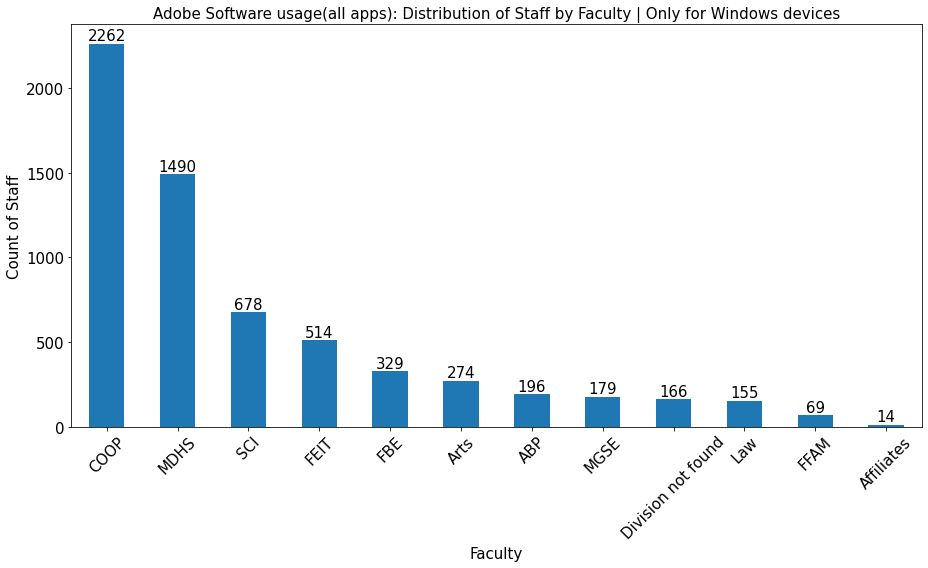

In [18]:
# Grouping by "Faculty" and counting occurrences
faculty_counts = adobe_processed_data["Faculty"].value_counts()

# Creating a bar plot with labels
plt.figure(figsize=(13, 8))
ax = faculty_counts.plot(kind="bar")
plt.title("Adobe Software usage(all apps): Distribution of Staff by Faculty | Only for Windows devices", fontsize = 15)
plt.xlabel("Faculty" , fontsize = 15)
plt.ylabel("Count of Staff" , fontsize = 15)
plt.xticks(rotation=45, fontsize=15)  # Rotate x-axis labels for better visibility
plt.yticks( fontsize=15)  
# Adding labels on top of the bars
for idx, count in enumerate(faculty_counts):
    ax.text(idx, count + 0.2, str(count), ha="center", va="bottom" , fontsize = 15)

plt.tight_layout()
plt.show()

### e. Create plots for individual Adobe software

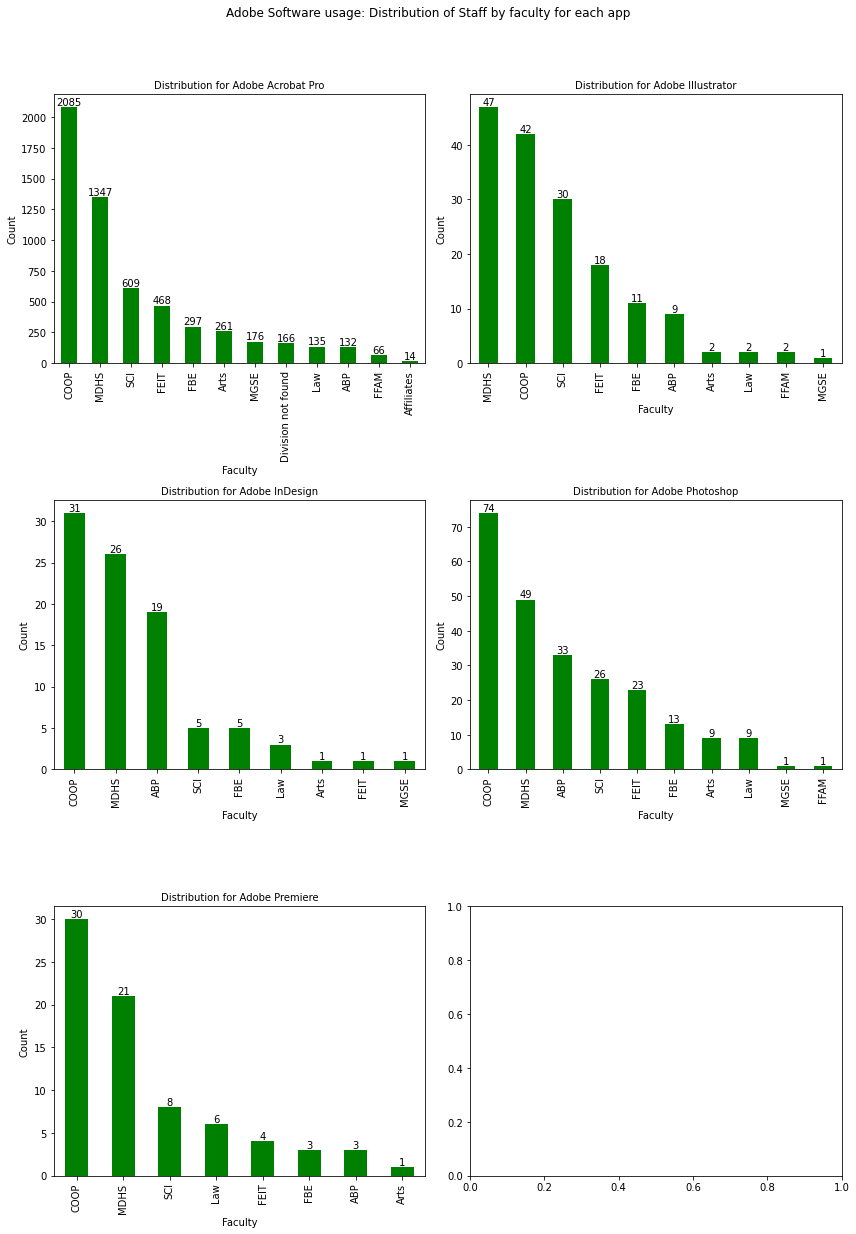

In [19]:
import matplotlib.pyplot as plt

# Assuming you have the adobe_software_merged2 DataFrame

# Get the number of unique software names
num_software = len(adobe_processed_data['Software Name'].unique())

# Calculate the number of rows and columns for the subplots grid
num_rows = (num_software + 1) // 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))
fig.suptitle('Adobe Software usage: Distribution of Staff by faculty for each app')

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate through each software and plot a bar chart
for i, software in enumerate(adobe_processed_data['Software Name'].unique()):
    software_data = adobe_processed_data.loc[adobe_processed_data['Software Name'] == software, 'Faculty'].value_counts()
    
    ax = axes[i]
    software_data.plot(kind='bar', color='green', ax=ax)
    
    ax.set_title(f'Distribution for {software}', fontsize = 10)
    ax.set_xlabel('Faculty', fontsize = 10)
    ax.set_ylabel('Count', fontsize = 10)
    
    # Rotate x-axis labels vertically
    ax.set_xticklabels(software_data.index, rotation='vertical', fontsize = 10)
    
    # Add labels to the bars
    for index, value in enumerate(software_data):
        ax.text(index, value, str(value), ha='center', va='bottom', fontsize=10)
    
# Adjust layout and spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

<div style="border-bottom: 4px solid black;"></div>

<div style="margin-top: 10px;"></div>

<div style="margin-top: 10px;"></div>

<div style="border-bottom: 4px solid black;"></div>

# (VI) Task 2.2 - Get a breakdown of Adobe software installation by Faculty (Staff Computers)

### a. Load data for Windows 

In [20]:
#Load all the individual Adobe software usage sheets into 1 dataframe
folder_path = pwd + '\\Source Data\\Lansweeper Adobe Installation Data'
file_list = os.listdir(folder_path)
dataframes = []

for filename in file_list:
    if filename.endswith('.xlsx'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_excel(file_path)
        dataframes.append(df)
adobe_software_installation_merged_win = pd.concat(dataframes, ignore_index=True)

#rename the asset column to DeviceName
adobe_software_installation_merged_win.rename(columns={'AssetName': 'DeviceName'}, inplace = True)
adobe_software_installation_merged_win.rename(columns={'software': 'Software Name'}, inplace = True)
adobe_software_installation_merged_win['DeviceName'] = adobe_software_installation_merged_win['DeviceName'].str.lower()
# Select only the "DeviceName" and "software" columns
adobe_software_installation_merged_win = adobe_software_installation_merged_win[["DeviceName", "Software Name"]]
# Filter rows based on the condition = -w
adobe_software_installation_merged_win = adobe_software_installation_merged_win[adobe_software_installation_merged_win['DeviceName'].str.endswith('-w')]
adobe_software_installation_merged_win['OS'] = 'Windows'

### b. Load data for Mac 

In [21]:
# Path to the folder containing CSV files
folder_path = pwd + '\\Source Data\\Jamf Adobe Installation Data'

# List to store DataFrames
data_frames = []

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Load CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Add 'Software Name' column and set values
        df['Software Name'] = os.path.splitext(filename)[0]  # Get file name without extension
        # Append the DataFrame to the list
        data_frames.append(df)

# Concatenate all DataFrames into a single DataFrame
adobe_software_installation_merged_mac = pd.concat(data_frames, ignore_index=True)
adobe_software_installation_merged_mac.rename(columns={'Computer Name': 'DeviceName'}, inplace = True)
adobe_software_installation_merged_mac['DeviceName'] = adobe_software_installation_merged_mac['DeviceName'].str.lower()
adobe_software_installation_merged_mac = adobe_software_installation_merged_mac[["DeviceName", "Software Name"]]
adobe_software_installation_merged_mac = adobe_software_installation_merged_mac[adobe_software_installation_merged_mac['DeviceName'].str.endswith('-m')]
adobe_software_installation_merged_mac['OS'] = 'Mac'

### c. Merge Mac and Windows data

In [22]:
adobe_software_installation_merged = pd.concat([adobe_software_installation_merged_win, adobe_software_installation_merged_mac], ignore_index=True)
adobe_software_installation_merged.shape

(23805, 3)

### d. Run the transformer function

In [23]:
# Create a copy
adobe_software_installation_merged = adobe_software_installation_merged.copy()
# Pass it through the transformer function
adobe_installation_processed_data = general_transformer(adobe_software_installation_merged, fleet, user_data, divisions)

In [24]:
# Group by 'Faculty' and count occurrences
faculty_counts = adobe_installation_processed_data['Faculty'].value_counts().reset_index()
faculty_counts.columns = ['Faculty', 'Count']

# Create a DataFrame from the grouped data
faculty_counts = pd.DataFrame(faculty_counts)

# Save the DataFrame to a CSV file
output_csv_path = pwd + '\\Output\\task_2_2.csv'
faculty_counts.to_csv(output_csv_path, index=False)

faculty_counts

Faculty  Count
0                 COOP   3957
1                 MDHS   3430
2                  SCI   1560
3                 FEIT    961
4                 Arts    736
5                  FBE    655
6                 FFAM    524
7                  ABP    502
8   Division not found    413
9                 MGSE    393
10                 Law    290
11          Affiliates     50

In [25]:
adobe_installation_processed_data['Software Name'] = adobe_installation_processed_data['Software Name'].str.replace(" 2023", "")

# Replace the incorrect name with the correct one
adobe_installation_processed_data['Software Name'] = adobe_installation_processed_data['Software Name'].replace('Adobe Ilustrator', 'Adobe Illustrator')


In [48]:
adobe_installation_processed_data = adobe_installation_processed_data.drop_duplicates(subset=['DeviceName', 'Software Name'])

In [49]:
adobe_installation_processed_data.shape

(13193, 9)

In [50]:
output_csv_path = pwd + '\\Output\\task_2_master.csv'
adobe_installation_processed_data.to_csv(output_csv_path, index=False)

In [51]:
adobe_installation_processed_data.shape

(13193, 9)

In [72]:
df = adobe_installation_processed_data.copy()

In [73]:
# Create a cross-tabulation
df_pivot = pd.crosstab(index=df['DeviceName'], columns=df['Software Name'])

# Rename columns for clarity
df_pivot.columns = [f'Software_{col}' for col in df_pivot.columns]

# Merge with original dataframe to get OS and Faculty columns
result = pd.merge(df[['DeviceName', 'OS', 'Faculty']].drop_duplicates(), df_pivot, on='DeviceName').reset_index(drop=True)
result.rename(columns={'Software_Adobe Acrobat Pro': 'Adobe Acrobat Pro'}, inplace = True)
result.rename(columns={'Software_Adobe Illustrator': 'Adobe Illustrator'}, inplace = True)
result.rename(columns={'Software_Adobe InDesign': 'Adobe InDesign'}, inplace = True)
result.rename(columns={'Software_Adobe Photoshop': 'Adobe Photoshop'}, inplace = True)
result.rename(columns={'Software_Adobe Premiere Pro': 'Adobe Premiere Pro'}, inplace = True)

# List of columns to replace values in
columns_to_replace = ['Adobe Acrobat Pro', 'Adobe Illustrator', 'Adobe InDesign', 'Adobe Photoshop', 'Adobe Premiere Pro']

# Replace values in the specified columns
result[columns_to_replace] = result[columns_to_replace].replace({1: 'TRUE', 0: ''})

result

DeviceName       OS             Faculty Adobe Acrobat Pro  \
0     0060l-130400-w  Windows                COOP              TRUE   
1     0060l-136592-w  Windows                COOP              TRUE   
2     0060l-143422-w  Windows                COOP              TRUE   
3     0060l-200343-w  Windows                COOP              TRUE   
4     0060l-200432-w  Windows                COOP              TRUE   
...              ...      ...                 ...               ...   
9053  1000l-133909-m      Mac  Division not found                     
9054  6030l-144854-m      Mac                 SCI                     
9055  7500l-152021-m      Mac                FFAM                     
9056  9350l-202032-m      Mac                 SCI                     
9057  1960l-210319-m      Mac                MDHS                     

     Adobe Illustrator Adobe InDesign Adobe Photoshop Adobe Premiere Pro  
0                                                                         
1                                                                         
2                                                                         
3                                                                         
4                                                                         
...                ...            ...             ...                ...  
9053                                                                TRUE  
9054                                                                TRUE  
9055                                                                TRUE  
9056                                                                TRUE  
9057                                                                TRUE  

[9058 rows x 8 columns]

In [74]:
columns_to_check = ['Adobe Illustrator', 'Adobe InDesign', 'Adobe Photoshop', 'Adobe Premiere Pro']
result = result.loc[result[columns_to_check].any(axis=1)]
for col in columns_to_replace:
    result[col] = result[col].apply(lambda x: col if x != '' else x)

result = result.drop(columns=['Adobe Acrobat Pro'])

result.head()

C:\Users\shivak\AppData\Local\Temp/ipykernel_16008/859496184.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result[col] = result[col].apply(lambda x: col if x != '' else x)


DeviceName       OS Faculty  Adobe Illustrator  Adobe InDesign  \
21  0920l-144914-w  Windows    COOP  Adobe Illustrator  Adobe InDesign   
23  0920l-149765-w  Windows    Arts  Adobe Illustrator  Adobe InDesign   
24  0920l-149772-w  Windows    COOP                                      
26  0920l-150186-w  Windows    COOP  Adobe Illustrator  Adobe InDesign   
28  0920l-151061-w  Windows    COOP                                      

    Adobe Photoshop  Adobe Premiere Pro  
21  Adobe Photoshop  Adobe Premiere Pro  
23  Adobe Photoshop  Adobe Premiere Pro  
24                   Adobe Premiere Pro  
26  Adobe Photoshop                      
28  Adobe Photoshop  Adobe Premiere Pro

In [75]:
output_csv_path = pwd + '\\Output\\task_2_master1.csv'
result.to_csv(output_csv_path, index=False)

### e. Plot

In [ ]:
# Grouping by "Faculty" and counting occurrences
faculty_counts = adobe_installation_processed_data["Faculty"].value_counts()

# Creating a bar plot with labels
plt.figure(figsize=(14, 8))
ax = faculty_counts.plot(kind="bar")
plt.title("Adobe Software installation(all apps): Distribution of Staff by Faculty | For Windows and Mac devices", fontsize=15)
plt.xlabel("Faculty", fontsize=15)
plt.ylabel("Count of Staff", fontsize=15)
plt.xticks(rotation=45, fontsize=15)  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=15)  

# Adding labels on top of the bars
for idx, count in enumerate(faculty_counts):
    ax.text(idx, count + 0.2, str(count), ha="center", va="bottom", fontsize=15)

plt.tight_layout()
plt.show()

<div style="border-bottom: 4px solid black;"></div>

<div style="margin-top: 10px;"></div>

<div style="margin-top: 10px;"></div>

<div style="border-bottom: 4px solid black;"></div>

# (VII) Task 3.1 - Get the Top 100 users of Adobe Acrobat (by usage)

    Get the top 10 users per faculty to get a cross section of users.

### Source files:  
All from Task 2

### Transformation steps:
1. Write a function that calculates Top 10 'TopUsageCount' users, groups them by 'Faculty'

In [ ]:
#creating user_data lookup
pwd = os.getcwd()
adobe_acrobat_top15 = pd.read_csv(pwd + '\\Source data\\Adobe_Usage_Data_v2.csv')
adobe_acrobat_top15['DeviceName'] = adobe_acrobat_top15['DeviceName'].str.lower()

In [ ]:
# Create a copy
adobe_acrobat_top15_processed = adobe_acrobat_top15.copy()
# Pass it through the transformer function
adobe_acrobat_top15_processed = general_transformer(adobe_acrobat_top15_processed, fleet, user_data, divisions)

In [ ]:
adobe_acrobat_top15_processed = adobe_acrobat_top15_processed[adobe_acrobat_top15_processed['FileName'] == 'Acrobat.exe']
adobe_acrobat_top15_processed.shape

In [ ]:
# Group the data by 'Faculty' and get the top 10 for each group
adobe_acrobat_top15_processed = adobe_acrobat_top15_processed[~adobe_acrobat_top15_processed['Faculty'].isin(['Division not found', 'Affiliates'])]
top_10_by_faculty = adobe_acrobat_top15_processed.groupby('Faculty', group_keys=False).apply(lambda group: group.nlargest(100, 'TotalUsageTime'))

In [ ]:
output_filename = pwd + '\\Output\\task_3_1.csv'
top_10_by_faculty.to_csv(output_filename, index=False)
top_10_by_faculty

# (VIII) Glossary

user: SamAccountName <br>
DeviceName: example - 0060l-143422-w <br>
faculty: example -   COOP, FEIT, MDHS <br>
department: example -  Business Services, Mechanical Engineering, Melbourne Dental School <br>
AccountStatus: True/False <br>
mail: user's email address <br>
jobTitle: Job Title <br>